In [ ]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Optionally, normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 2s 0us/step


#  Data Exploration

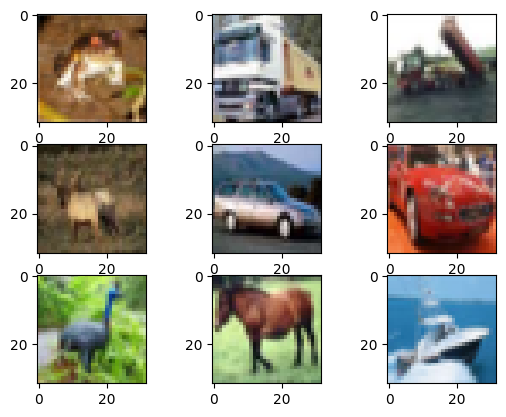

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
import matplotlib.pyplot as plt

# Visualize some images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

# Check shapes
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

## Training data shape: (50000, 32, 32, 3),Test data shape: (10000, 32, 32, 3)

#  Preprocessing

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional base
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flattening and dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Summarize the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Model Compilation

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training

In [ ]:
epochs = 10
batch_size = 64

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 39s 49ms/step - loss: 1.8290 - accuracy: 0.3187 - val_loss: 1.4834 - val_accuracy: 0.4649
Epoch 2/10
782/782 [==============================] - 38s 49ms/step - loss: 1.4860 - accuracy: 0.4624 - val_loss: 1.2992 - val_accuracy: 0.5339
Epoch 3/10
782/782 [==============================] - 38s 48ms/step - loss: 1.3536 - accuracy: 0.5191 - val_loss: 1.1669 - val_accuracy: 0.5927
Epoch 4/10
782/782 [==============================] - 37s 47ms/step - loss: 1.2579 - accuracy: 0.5563 - val_loss: 1.1683 - val_accuracy: 0.5928
Epoch 5/10
782/782 [==============================] - 37s 48ms/step - loss: 1.1793 - accuracy: 0.5854 - val_loss: 1.0126 - val_accuracy: 0.6464
Epoch 6/10
782/782 [==============================] - 37s 48ms/step - loss: 1.1227 - accuracy: 0.6094 - val_loss: 1.0144 - val_accuracy: 0.6492
Epoch 7/10
782/782 [==============================] - 38s 48ms/step - loss: 1.0717 - accuracy: 0.6253 - val_loss: 0.9906 - val_accuracy:

# Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 8ms/step - loss: 0.9016 - accuracy: 0.6896
Test accuracy: 0.6895999908447266


# Analysis

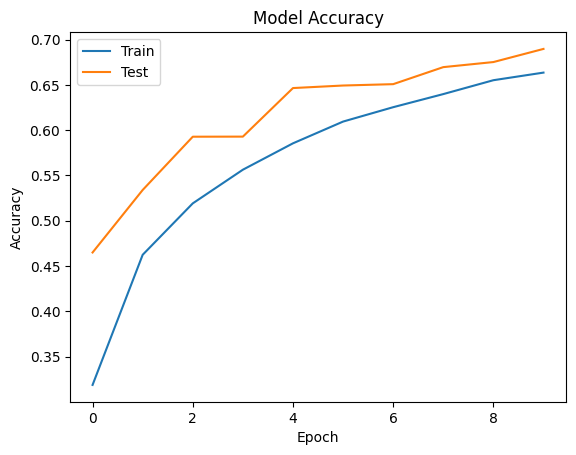

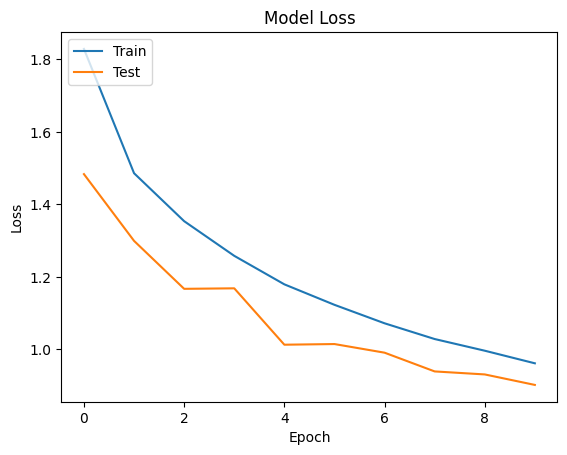

In [ ]:
# Plotting training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


used the model to predict the things the images.

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Google Drive shareable link
file_id = '1fs-Vc-MhPfQjKRXP3us7luE_Nqp4Lj_5'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the image
response = requests.get(download_url)
image = Image.open(BytesIO(response.content))

# Convert to RGB
image = image.convert('RGB')

# Resize the image
image = image.resize((32, 32))

# Preprocess the image
img_array = img_to_array(image)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.0  # Normalize the image

# Make sure your model is defined and loaded here
# Make a prediction
predictions = model.predict(img_array)

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Determine the most likely class
predicted_class = np.argmax(predictions, axis=1)
predicted_class_name = class_names[predicted_class[0]]

print(f"The image is predicted to be: {predicted_class_name}")


1/1 [==============================] - 0s 74ms/step
The image is predicted to be: automobile


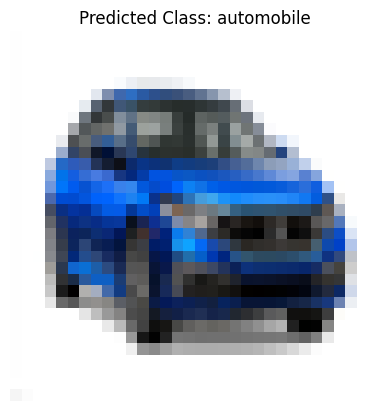

In [ ]:
# Display the image
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')  # Turn off axis labels
plt.show()

Introduction

The classic problem in the field of machine learning and computer vision: image classification. For this specific task involves classifying images from the CIFAR-10 dataset, a well-known dataset in the machine learning community consisting of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The goal of the project is to build and train a neural network model that can accurately classify these images into their respective categories.

Methodology

The approach to solving this problem involves several key steps, as outlined in the notebook:

Data Loading: The CIFAR-10 dataset is loaded using TensorFlow's Keras API. This dataset is split into training and testing sets.

Data Exploration: The notebook includes visualizations of the dataset images, helping to understand the data format and the types of images included.

Preprocessing: The data is preprocessed for the neural network. This includes normalizing the pixel values of the images to a range of 0 to 1 and converting the labels to a one-hot encoded format.

Model Building: A convolutional neural network (CNN) model is constructed using TensorFlow's Keras API. The model includes layers like Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.

Model Compilation: The model is compiled with the Adam optimizer and the categorical crossentropy loss function, which are standard choices for multi-class classification problems.

Training: The model is trained on the training data, using a specified number of epochs and batch size.

Evaluation: After training, the model's performance is evaluated on the test set to assess its accuracy.

Analysis: The notebook includes plots of training and validation accuracy over epochs, providing insight into the model's learning process and its performance over time.

Predictions: Using the model to make predictions on images.

Results

Visualizations of the CIFAR-10 dataset images. Training and validation accuracy plots, showing the model's performance across epochs. Test accuracy, providing a quantitative measure of the model's ability to generalize to new, unseen data.

Test Accuracy Improvement: The model's test accuracy has significantly improved to approximately 68.90%. This indicates that the model is now better at classifying the CIFAR-10 images. While this is a substantial improvement, there is still room for further enhancement, as CIFAR-10 is a challenging data set with diverse images. I tested the model with a automobile image and it gave predicted correctly.

Conclusions/Recommendations

The increase in accuracy suggests that the modifications to the model and training process were effective. However, CIFAR-10 remains a challenging dataset, and continuous experimentation and optimization may lead to further improvements. Recommendations might include experimenting with different model architectures, data augmentation, or more advanced training techniques to improve performance.

Acknowledgements

The analysis and model building in this notebook were facilitated by the use of TensorFlow and Keras, popular open-source libraries for machine learning and deep learning.



References

The primary reference for this project is the CIFAR-10 dataset, which is a staple in machine learning for image classification tasks:

Krizhevsky, A., Hinton, G., et al. (2009). "Learning Multiple Layers of Features from Tiny Images," CIFAR-10 Dataset.

In addition, TensorFlow and Keras documentation would have been instrumental in guiding the model building and training processes:

TensorFlow. (n.d.). "TensorFlow Documentation." Retrieved from https://www.tensorflow.org/.

Keras. (n.d.). "Keras Documentation." Retrieved from https://keras.io/.

